## Task-01  

### 📌 Objective:  
Create a **bar chart** or **histogram** to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.  

### 📊 Sample Dataset:  
[World Bank Population Data](https://data.worldbank.org/indicator/SP.POP.TOTL)  


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv"
df = pd.read_csv(file_path, skiprows=4)  # Skipping metadata rows

In [41]:
df.info()  # Get column details
df.columns  # See available column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [42]:
# Load the country metadata
meta_country = pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv")
# Load the indicator metadata
meta_indicator = pd.read_csv("Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv")

In [43]:
print(meta_country.columns)
print(meta_indicator.columns)

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')
Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')


In [44]:
#dropping empty data columns
meta_country = meta_country.drop(columns=["Unnamed: 5"], errors="ignore")
meta_indicator = meta_indicator.drop(columns=["Unnamed: 4"], errors="ignore")
df = df.drop(columns=["Unnamed: 68"], errors="ignore")

In [45]:
print(df.isnull().sum())  # Check missing values per column

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64


In [46]:
#since meta provides us with smaller details we'll merge them to make our population dataset more robust
df = df.merge(meta_country, on="Country Code", how="left")
df = df.merge(meta_indicator, left_on="Indicator Code", right_on="INDICATOR_CODE", how="left")

In [47]:
df = df.drop(columns=["INDICATOR_CODE", "SpecialNotes"], errors="ignore")

In [48]:
print(df.isnull().sum())

Country Name            0
Country Code            0
Indicator Name          0
Indicator Code          0
1960                    2
                       ..
IncomeGroup            50
TableName               1
INDICATOR_NAME          0
SOURCE_NOTE             0
SOURCE_ORGANIZATION     0
Length: 74, dtype: int64


In [49]:
df[df["IncomeGroup"].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2020,2021,2022,2023,Region,IncomeGroup,TableName,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1.300721e+08,1.335349e+08,1.371717e+08,1.409455e+08,1.449041e+08,1.490335e+08,...,6.944461e+08,7.130909e+08,7.318214e+08,7.505038e+08,NaN,NaN,Africa Eastern and Southern,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,9.763092e+07,9.970667e+07,1.018548e+08,1.040892e+08,1.063884e+08,1.087726e+08,...,4.745694e+08,4.859210e+08,4.973872e+08,5.093986e+08,NaN,NaN,Africa Western and Central,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
7,Arab World,ARB,"Population, total",SP.POP.TOTL,9.154085e+07,9.393168e+07,9.642860e+07,9.903851e+07,1.017298e+08,1.044940e+08,...,4.537232e+08,4.606466e+08,4.713521e+08,4.816675e+08,NaN,NaN,Arab World,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
36,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,9.140176e+07,9.223274e+07,9.300950e+07,9.384002e+07,9.471580e+07,9.544099e+07,...,1.020466e+08,1.006476e+08,1.002894e+08,1.001759e+08,NaN,NaN,Central Europe and the Baltics,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
49,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1.713405e+06,1.751114e+06,1.789993e+06,1.831474e+06,1.871841e+06,1.911273e+06,...,3.092577e+06,3.111609e+06,3.131505e+06,3.152394e+06,NaN,NaN,Caribbean small states,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
61,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,8.959615e+08,8.955346e+08,9.074730e+08,9.308108e+08,9.537835e+08,9.773669e+08,...,2.121866e+09,2.128554e+09,2.133560e+09,2.137528e+09,NaN,NaN,East Asia & Pacific (excluding high income),"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
62,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.689094e+08,9.941768e+08,1.020131e+09,1.046697e+09,1.074021e+09,1.101264e+09,...,3.396051e+09,3.432026e+09,3.470645e+09,3.511077e+09,NaN,NaN,Early-demographic dividend,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
63,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.042838e+09,1.044750e+09,1.059217e+09,1.085095e+09,1.110651e+09,1.136869e+09,...,2.369439e+09,2.375144e+09,2.379648e+09,2.384464e+09,NaN,NaN,East Asia & Pacific,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
64,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,1.288105e+08,1.316179e+08,1.344004e+08,1.371878e+08,1.399740e+08,1.426686e+08,...,2.506553e+08,2.521838e+08,2.508340e+08,2.491462e+08,NaN,NaN,Europe & Central Asia (excluding high income),"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
65,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,6.678878e+08,6.755500e+08,6.833421e+08,6.911894e+08,6.990584e+08,7.066834e+08,...,9.250885e+08,9.250758e+08,9.253853e+08,9.249699e+08,NaN,NaN,Europe & Central Asia,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...


In [50]:
#for population data 1960,... fill them with data from the next field
df = df.bfill(axis=1)

In [51]:
#filling with a placeholder because I dont to drop too much data
df["IncomeGroup"] = df["IncomeGroup"].fillna("Unknown")

In [52]:
#since tablename only has one missing value we'll use the placeholder again
df["TableName"] = df["TableName"].fillna("Unknown")

In [53]:
print(df.isnull().sum())

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960                   0
                      ..
IncomeGroup            0
TableName              0
INDICATOR_NAME         0
SOURCE_NOTE            0
SOURCE_ORGANIZATION    0
Length: 74, dtype: int64


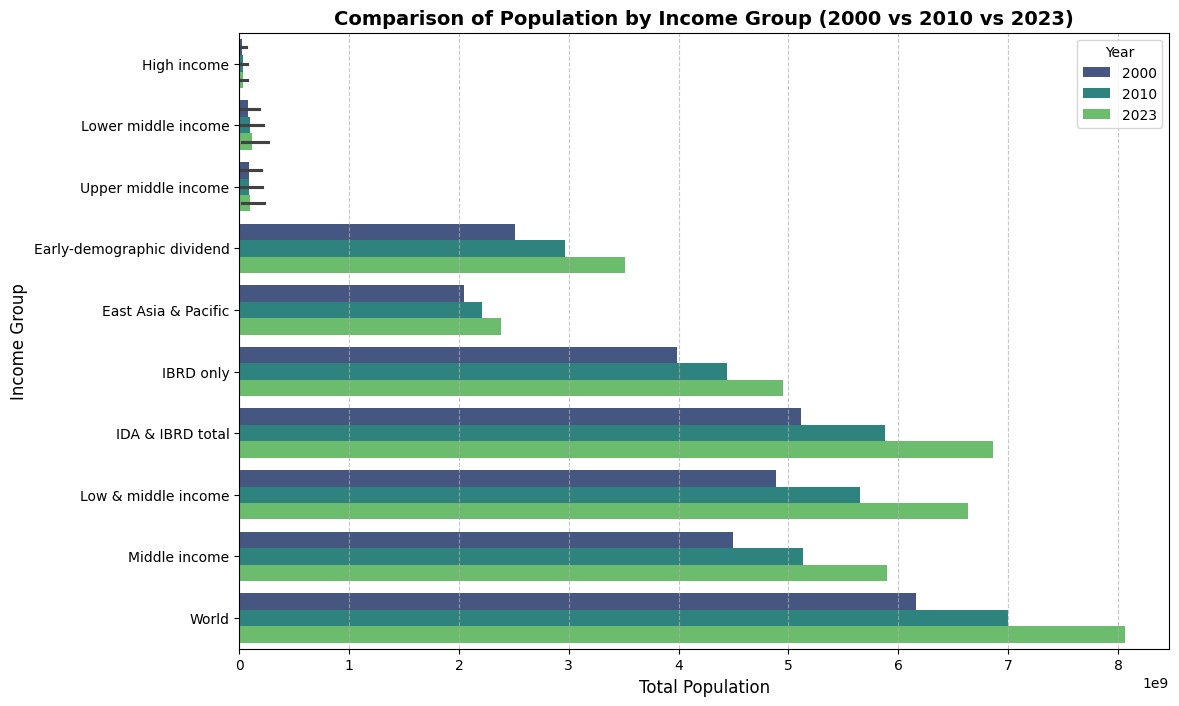

In [57]:
df["2023"] = pd.to_numeric(df["2023"], errors="coerce")

# Select top 10 income groups based on total population in 2023
top_n = 10
top_income_groups = df.groupby("IncomeGroup")["2023"].sum().nlargest(top_n).index
filtered_df = df[df["IncomeGroup"].isin(top_income_groups)]

# Melt DataFrame for visualization
melted_df = filtered_df.melt(id_vars="IncomeGroup", value_vars=["2000", "2010", "2023"],
                             var_name="Year", value_name="Total Population")

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=melted_df, y="IncomeGroup", x="Total Population", hue="Year", palette="viridis", ax=ax)

# Formatting
ax.set_title("Comparison of Population by Income Group (2000 vs 2010 vs 2023)", fontsize=14, fontweight="bold")
ax.set_xlabel("Total Population", fontsize=12)
ax.set_ylabel("Income Group", fontsize=12)
ax.legend(title="Year")
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.savefig("population_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

### Why Are We Doing This?  

- **Understand how population distribution has evolved** over time (2000, 2010, 2023).  
- **Identify shifts in demographic concentration**—are populations becoming more evenly distributed or clustered?  
- **Use logarithmic scaling** to handle extreme differences in population sizes across countries.  

This visualization helps policymakers, researchers, and analysts track **global demographic trends** and their implications.  

### Key Takeaways  

- **Most populations are concentrated at the lower end**, but a few countries have extremely high populations.  
- **The overall shape remains similar**, but the 2023 curve slightly shifts, indicating population growth.  
- **The KDE (smoothed line) helps reveal distribution patterns** that raw histograms might obscure.  


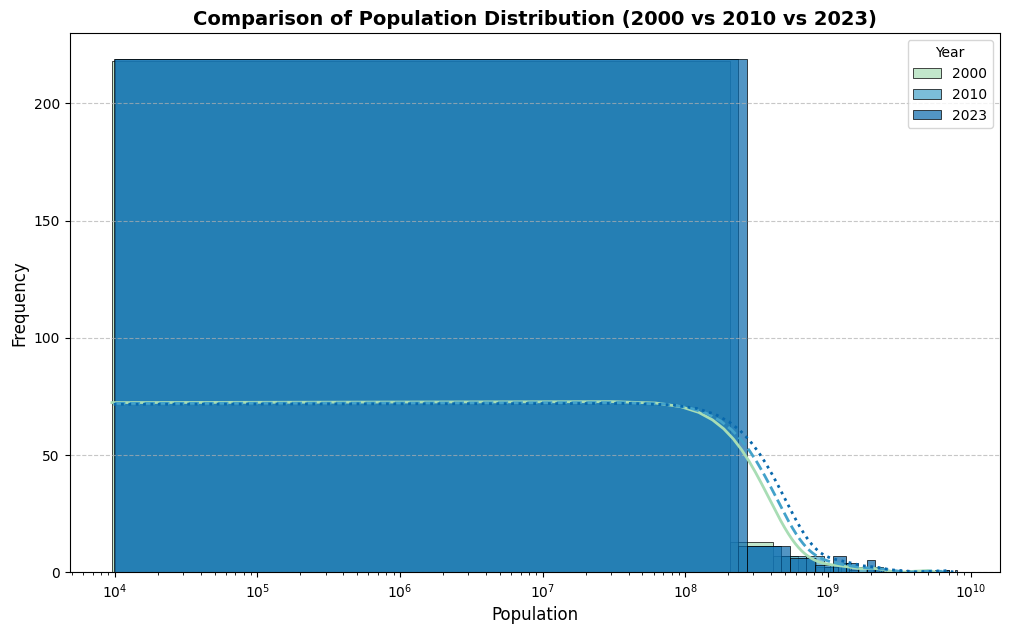

In [60]:
for year in ["2000", "2010", "2023"]:
    df[year] = pd.to_numeric(df[year], errors="coerce")

plt.figure(figsize=(12, 7))

# More distinct greenish shades
colors = ["#a8ddb5", "#43a2ca", "#0868ac"]
line_styles = ['-', '--', ':']  # Line styles for KDE

# Plot histograms with adjusted settings
for i, year in enumerate(["2000", "2010", "2023"]):
    sns.histplot(df[year].dropna(), bins=30, color=colors[i], alpha=0.7, label=year,
                 kde=True, line_kws={'linestyle': line_styles[i], 'linewidth': 2}, 
                 edgecolor='black', linewidth=0.5)

plt.title("Comparison of Population Distribution (2000 vs 2010 vs 2023)", fontsize=14, fontweight="bold")
plt.xlabel("Population", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Year")

plt.savefig("population_distribution.png", dpi=300, bbox_inches="tight")  # Saves as PNG
plt.show()